In [10]:
import numpy as np
import pandas as pd
import keras
from keras.optimizers import Adam

from keras.models import Model

from keras.layers import Activation, Dense, Dropout

from keras.models import Sequential

from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import tensorflow as tf

from sklearn.metrics import median_absolute_error

from textblob import TextBlob


In [24]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

def variables_from_text(text):
    
    rep = []
    
    #positividad = []
    
    longitud_palabras = []
    
    if text == "":
        
        rep.append(0)
        
        positividad.append(0)
        
        longitud_palabras.append(0)
        
        return rep, positividad, longitud_palabras
        
    else:
        
        counter = word_count(text)
    
        for key in counter.keys():
            rep.append(counter[key])
            
            longitud_palabras.append(len(key))
            
        long_media = np.mean(longitud_palabras)
        
        rep_media = np.mean(rep)
        
        positividad = TextBlob(text).sentiment.polarity
        
        subjectivity = TextBlob(text).sentiment.subjectivity
        
        return rep_media, positividad, long_media, subjectivity
    
def fill_with_textvars(df):
    
    rep, pos, long, subj = [], [], [], []
    
    for i in range(df.shape[0]):
        
        r, p, l, s = variables_from_text(str(df['descr'].iloc[i]))
        
        rep.append(r)
        
        pos.append(p)
        
        long.append(l)
        
        subj.append(s)
        
    df['subj'] = subj
    
    df['pos'] = pos
    
    df['rep'] = rep
    
    df['long'] = long
    
    df.drop('descr', axis = 1, inplace = True)
    df.drop('distr', axis = 1, inplace = True)
    return df

In [25]:
# Importacion de datos
data=pd.read_csv('transformados07.csv')
# Creacion de nuevas variables
data['exit_rate_page_views'] = data['GA_exit_rate']*data['GA_page_views']
data['views_precio_metro'] = data['GA_page_views'] * data['precio_metros']

data = fill_with_textvars(df = data)


In [26]:
# Separacion datasets
y=data['TARGET']
X=data.copy().drop('TARGET', axis=1)

In [1]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=69)

NameError: name 'train_test_split' is not defined

In [27]:
def NN(dropout = 0.15):
  #Model Creation
  
    model = Sequential()
  
  #first hidden layer
    model.add(Dense(100, input_dim=137, kernel_initializer='normal', activation='relu'))
  
    model.add(Dropout(dropout))
  
  #second hidden layer
    model.add(Dense(50, kernel_initializer = 'normal', activation = 'relu'))
  
    model.add(Dropout(dropout))
  
  #Third hidden layer
    model.add(Dense(20, kernel_initializer = 'normal', activation = 'relu'))
  
    model.add(Dropout(dropout/2))
    
    model.add(Dense(20, kernel_initializer = 'normal', activation = 'relu'))
    
    model.add(Dropout(dropout/2))
    
    model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu'))
  
  #Fourth hidden layer (output neuron)
    model.add(Dense(1, kernel_initializer = 'normal'))
  
  #Compile Model. 
    model.compile(loss = "mse",
               optimizer = 'adam')
  
    return model

In [28]:
# Lista de callbacks
# callbacks_list = [
#     keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=4, verbose=1, mode='auto', baseline=None, restore_best_weights=False),
#     keras.callbacks.History()]
callbacks_list = [keras.callbacks.History()]

In [29]:
# Model Training
# epochs=np.arange(20, 600, 50)
# batch_sizes = np.arange(128,129, 500)
# results_train=[]
# results=[]

model=NN()

# for e in epochs:
#     for b in batch_sizes:
#         tf.random.set_random_seed(69)
#         with tf.device('/device:GPU:0'):
#             model.fit(X_train, y_train, epochs=e, batch_size=b,verbose=False, callbacks=callbacks_list)
#         results_train.append(median_absolute_error(np.exp(y_train) - 1, np.exp(model.predict(X_train)) - 1))
#         results.append(median_absolute_error(np.exp(y_test) - 1, np.exp(model.predict(X_test)) - 1))

tf.random.set_random_seed(69)
with tf.device('/device:GPU:0'):
    model.fit(X, y, epochs=70, batch_size=128,verbose=False, callbacks=callbacks_list)
# results_train.append(median_absolute_error(np.exp(y_train) - 1, np.exp(model.predict(X_train)) - 1))
# results.append(median_absolute_error(np.exp(y_test) - 1, np.exp(model.predict(X_test)) - 1))

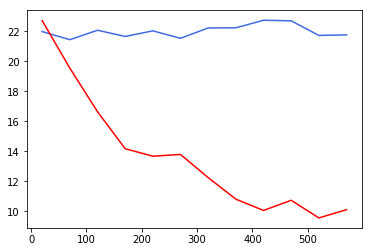

In [59]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# plt.plot(epochs,results, color='royalblue')
# plt.plot(epochs,results_train, color='red')

In [9]:
# Para hacer cross validation con keras
# estimators = []

# estimators.append(KerasRegressor(build_fn=NN().fit(X_train, y_train), 
#                                          epochs=60, batch_size=12, verbose=1))
# pipeline = Pipeline(estimators)
# kfold = KFold(n_splits=5, random_state=7)
# results = cross_val_score(pipeline, X_train, y_train, scoring=make_scorer(sklearn.metrics.median_absolute_error)
# ,cv=kfold)
# print("Wider: %.2f (%.2f) Median Absolute Error" % (results.mean(), results.std()))